In [1]:
# import the necessary packages

# for the lbp
from skimage import feature

import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [2]:
def resizeImage(image):
    (h, w) = image.shape[:2]

    width = 360  #  This "width" is the width of the resize`ed image
    # calculate the ratio of the width and construct the
    # dimensions
    ratio = width / float(w)
    dim = (width, int(h * ratio))
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    #resized = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)
    return resized

In [3]:
# 1 load the image
imagepath = r"Dataset HAAR/thermal face cropped Fauzan/fauzan.208.jpg"
# , double it in size, and grab the cell size
image = cv2.imread(imagepath)
#image = imutils.resize(image, width=image.shape[1] * 2, inter=cv2.INTER_CUBIC)

# 2 resize the image
image = resizeImage(image)
(h, w) = image.shape[:2]
#cellSize = 16 * 2
cellSize = h/10

# 3 convert the image to grayscale and show it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image", gray)
cv2.waitKey(0)

# save the image
cv2.imwrite("LBP example feature/gray_resized_image.png", gray)


True

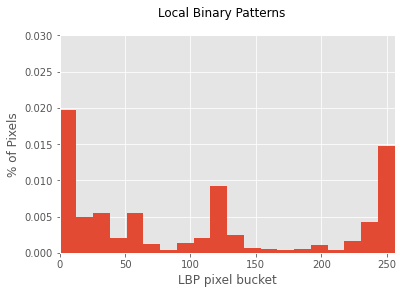

TypeError: 'float' object cannot be interpreted as an integer

In [16]:
# construct the figure
plt.style.use("ggplot")
(fig, ax) = plt.subplots()
fig.suptitle("Local Binary Patterns")
plt.ylabel("% of Pixels")
plt.xlabel("LBP pixel bucket")

# plot a histogram of the LBP features and show it

# displaying default to make cool image
features = feature.local_binary_pattern(gray, 10, 5, method="default") # method="uniform")
cv2.imshow("LBP", features.astype("uint8"))
cv2.waitKey(0)

# Save figure of lbp_image
cv2.imwrite("LBP example feature/lbp_image.png", features.astype("uint8"))

ax.hist(features.ravel(), density=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])
# save figure
fig.savefig('LBP example feature/lbp_histogram.png')   # save the figure to file
plt.show()

cv2.destroyAllWindows()
#######################################################################

# create the 3D grayscale image --> so that I can make color squares for figures to the thesis
# This does not change the histograms created. 
stacked = np.dstack([gray]* 3)

# Divide the image into 100 pieces
(h, w) = stacked.shape[:2]
cellSizeYdir = h/10
cellSizeXdir = w /10



# Draw the box around area
# loop over the x-axis of the image
for x in range(0, w, cellSizeXdir):
    # draw a line from the current x-coordinate to the bottom of
    # the image

    cv2.line(stacked, (x, 0), (x, h), (0, 255, 0), 1)
    #   
# loop over the y-axis of the image
for y in range(0, h, cellSizeYdir):
    # draw a line from the current y-coordinate to the right of
    # the image
    cv2.line(stacked, (0, y), (w, y), (0, 255, 0), 1)

# draw a line at the bottom and far-right of the image
cv2.line(stacked, (0, h - 1), (w, h - 1), (0, 255, 0), 1)
cv2.line(stacked, (w - 1, 0), (w - 1, h - 1), (0, 255, 0), 1)


In [15]:

# construct the figure
plt.style.use("ggplot")
(fig, ax) = plt.subplots()
fig.suptitle("Local Binary Patterns")
plt.ylabel("% of Pixels")
plt.xlabel("LBP pixel bucket")

# extract the ROI from the image -- have t take into accound the different dimensions ... ...
#start = cellSize * 6  #3
#end = cellSize *7 # 4

#roi = gray[start:end, start:end]
#roi = gray[cellSizeXdir*6:cellSizeXdir*7, cellSizeYdir*6:cellSizeYdir*7]
roi = gray[cellSizeXdir*5:cellSizeXdir*6, cellSizeYdir*5:cellSizeYdir*6]

# Draw a red box around ROI
#cv2.rectangle(stacked, (start, start), (end, end), (0, 0, 255), 2)
cv2.rectangle(stacked, (cellSizeXdir*5, cellSizeYdir*5), (cellSizeXdir*6, cellSizeYdir*6), (0, 0, 255), 2)

# plot a histogram of the LBP uniform feature and show the output
#features = feature.local_binary_pattern(roi, 24, 3, method="uniform")
features = feature.local_binary_pattern(roi, 10, 5, method="uniform")
#lbp = feature.local_binary_pattern(roi, 10, 5, method="uniform")
print len(np.unique(features))
print len(features)
n_bins = features.max() + 1
#ax.hist(features.ravel(), normed=True, bins=25, range=(0, 26))
ax.hist(features.ravel(), density=True, bins=n_bins, range=(0,n_bins))
# features.ravel()--> flattens the array into a 1d - array


#ax.set_xlim([0, 26])
cv2.imshow("{}px x {}px".format(cellSize, cellSize), stacked)
cv2.waitKey(0)
# save figure
fig.savefig('LBP example feature/lbp_histogramofROI_onStructure.png')   # save the figure to file
#plt.close(fig)    # close the figure

plt.show()


# Save figure of grid with ROI
cv2.imwrite("LBP example feature/grid_withRoi_lbp_onStructure.png", stacked)

SyntaxError: invalid syntax (Temp/ipykernel_14668/1778978971.py, line 24)